## The FinancialInstrument Class live in action (Part 1)
Goal: Analyzing Financial Instruments (e.g. stocks) efficiently

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("seaborn-v0_8")

In [2]:
class FinancialInstrument():
    """Class for analyzing Financial Instruments like stocks.

    Attributes:
    ==========
    ticker: str
        ticker symbol with which to work with
    start: str
        start date for data retrieval
    end: str
        end date for data retrieval

    Methods:
    =======
    get_data:
        retrieves daily price data (from yahoo finance) and prepares the data
    log_returns:
        calculates log returns
    plot_prices:
        creates a price chart
    plot_returns:
        plots log returns either as time series ("ts") or histogram ("hist")
    set_ticker:
        sets a new ticker
    mean_return:
        calculates mean return
    std_returns:
        calculates the standard deviation of returns (risk)
    annualized_perf:
        calculates annulized return and risk
    """    
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker={}, start={}, end={})".format(self.ticker, 
                                                                         self.start, 
                                                                         self.end)
    def get_data(self):
        """Retrieve (from yahoo finance) and prepares the data."""
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        """Calculate log returns"""
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        """Create a price chart."""
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self.ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        """Plot log returns either as time series ("ts") or histogram ("hist")."""
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self.ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self.ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        """Set a new ticker symbol."""
        if ticker is not None:
            self.ticker = ticker
            self.get_data()
            self.log_returns()
            
    def mean_return(self, freq = None):
        """Calculate mean return."""
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        """Calculate the standard deviation of returns (risk)."""
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        """Calculate annulized return and risk."""
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

__Instantiation__

In [3]:
stock = FinancialInstrument(ticker="AAPL", start="2015-01-01", end="2019-12-31" ) # instantiation
stock

[*********************100%***********************]  1 of 1 completed


FinancialInstrument(ticker = AAPL, start = 2015-01-01, end = 2019-12-31)

In [4]:
type(stock)

__main__.FinancialInstrument

__Attributes__

In [5]:
stock.ticker

'AAPL'

In [6]:
stock.start

'2015-01-01'

In [7]:
stock.end

'2019-12-31'

In [8]:
stock.data

,price,log_returns
Date,,
2015-01-02,27.332500,NaN
2015-01-05,26.562500,-0.028576
2015-01-06,26.565001,0.000094
2015-01-07,26.937500,0.013925
2015-01-08,27.972500,0.037703
...,...,...
2019-12-23,71.000000,0.016187
2019-12-24,71.067497,0.000950
2019-12-26,72.477501,0.019646


__Methods__

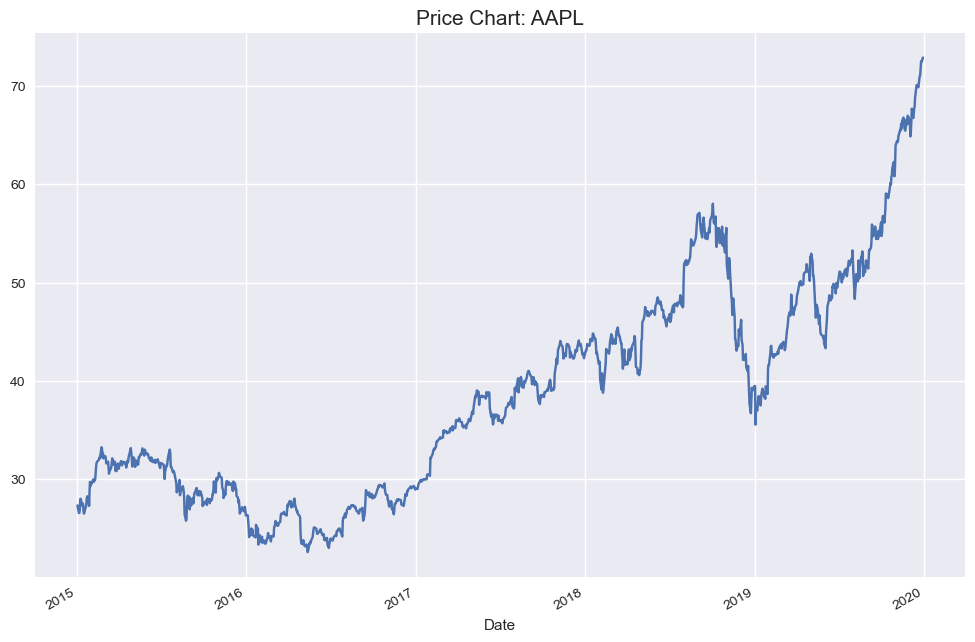

In [9]:
stock.plot_prices()

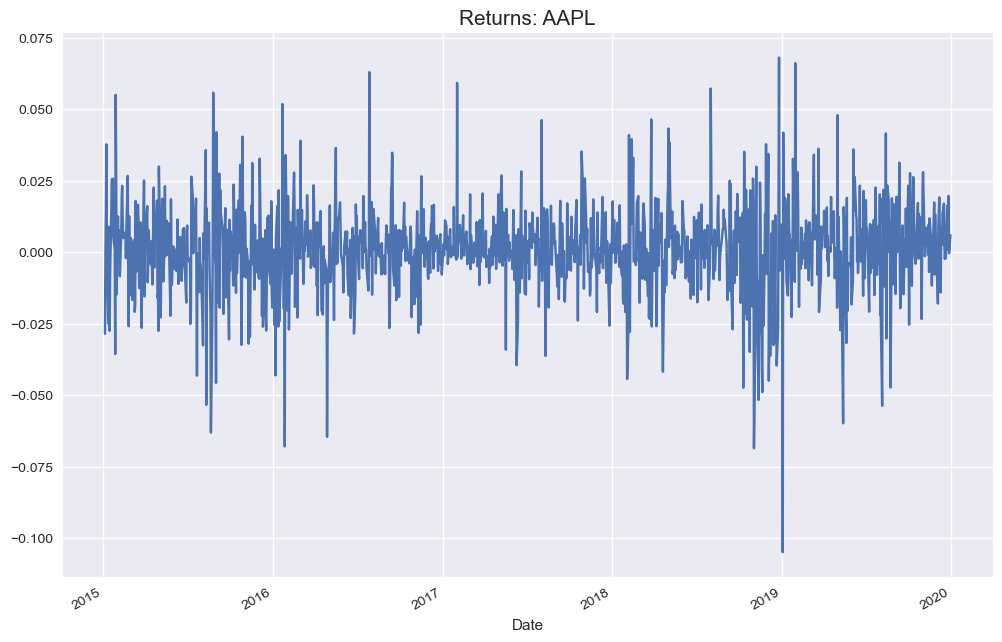

In [10]:
stock.plot_returns()

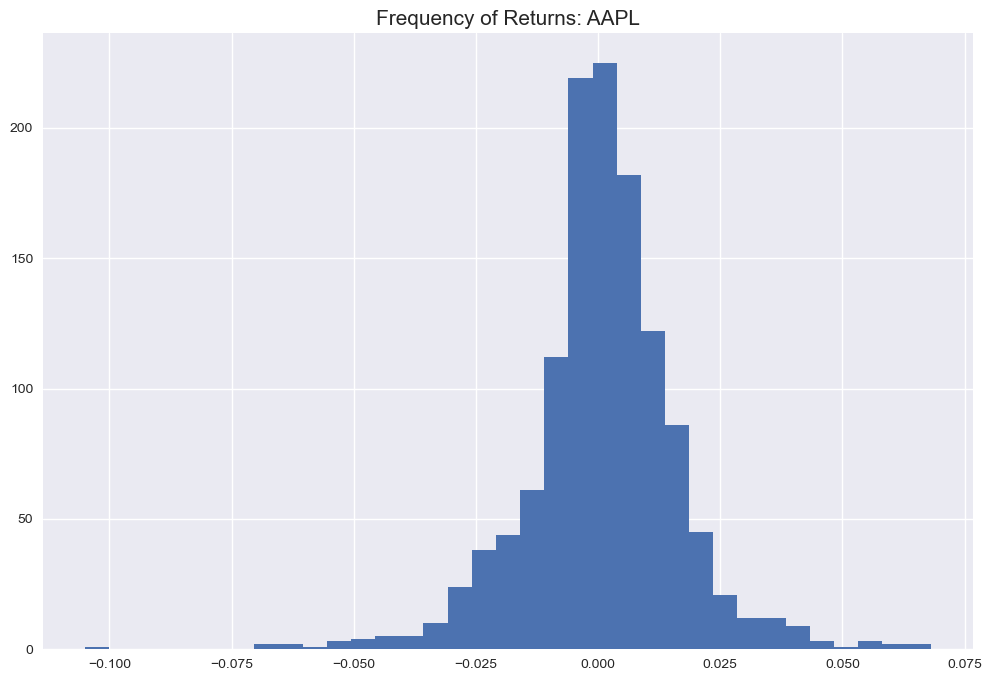

In [11]:
stock.plot_returns(kind = "hist")

## The FinancialInstrument Class live in action (Part 2)

__More Methods__

In [12]:
stock.mean_return()

0.0007808421402793629

In [13]:
stock.data.log_returns.mean()

0.0007808421402793629

In [14]:
stock.mean_return(freq="w")

0.0037576158168232733

In [15]:
stock.std_returns()

0.01569292603658385

In [16]:
stock.std_returns(freq="w")

0.03478401611459764

In [17]:
stock.annualized_perf()

Return: 0.197 | Risk: 0.249


In [18]:
stock.set_ticker("GE")

[*********************100%***********************]  1 of 1 completed


In [19]:
stock.ticker

'GE'

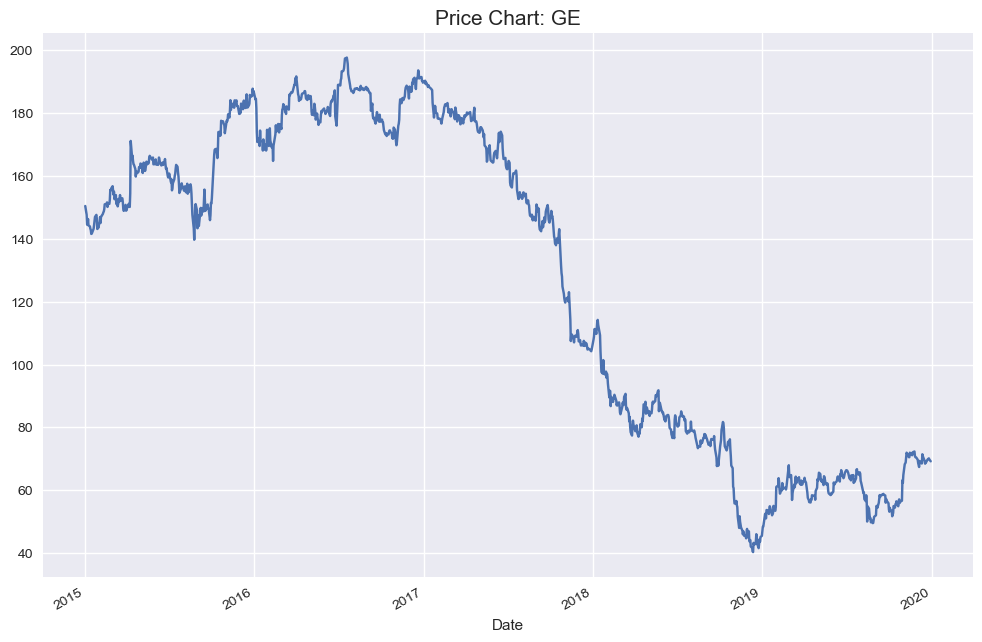

In [20]:
stock.plot_prices()

In [21]:
stock.annualized_perf()

Return: -0.156 | Risk: 0.298
